In [232]:
import glob
import numpy as np
import datetime
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cartopy import crs as ccrs
import cartopy
import math
import os
import matplotlib.font_manager as fm
path_font = "/home/hidrologia/jupyter/AvenirLTStd-Book/"
prop = fm.FontProperties(fname=path_font+'AvenirLTStd-Heavy.otf')
prop_1 = fm.FontProperties(fname=path_font+'AvenirLTStd-Book.otf')
prop_2 = fm.FontProperties(fname=path_font+'AvenirLTStd-Black.otf')
%matplotlib inline


['/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110300.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110400.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110500.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110600.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110700.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110800.5days.nc'
 '/var/meteo/GFS/BT/BT_Aire/BT_GFS.3h.800hPa.2022110900.5days.nc']
(56,) (56,)


/tmp/ipykernel_4112141/720283371.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/tmp/ipykernel_4112141/720283371.py:91: RuntimeWarning: divide by zero encountered in float_scalars
  dir1 = math.degrees(math.atan(((y1-y2)/(x1-x2))))
/tmp/ipykernel_4112141/720283371.py:91: RuntimeWarning: invalid value encountered in float_scalars
  dir1 = math.degrees(math.atan(((y1-y2)/(x1-x2))))
/tmp/ipykernel_4112141/720283371.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["E","NE","N","NO","O","SO","S","SE"], fontproperties=prop,
/home/hidrologia/py_env/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visib

0

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

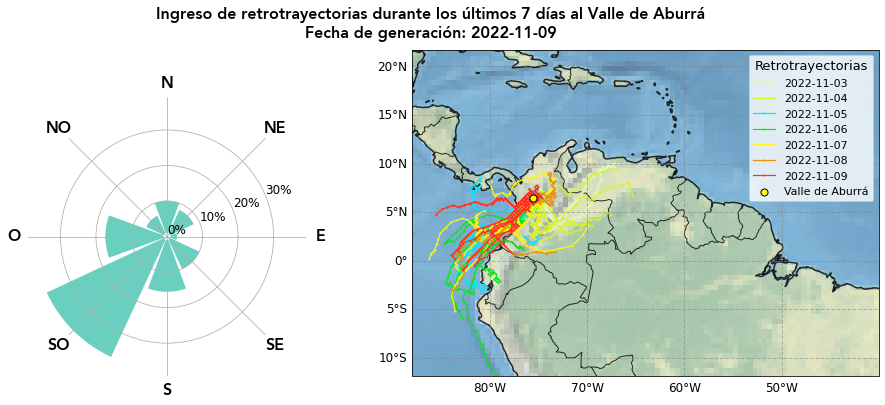

In [243]:
colores_dias = ["#043540", "#F29F05", "#F27405", "#D95204", "#8C3414",
               "#D96941", "#A62B1F"]
colores_dias = ["#DAFDBA", "#DBF227","#05E6FF", "#05E816", "#FFF312","#EB8F10", "#FF2F24" ]
labels_dirs = ["E","NE","N","NO","O","SO","S","SE"]
def read_nc(file_i):
    """Función que lee los archivos donde se almacenan las BT
    diarias y devuelve cada componente"""
    #print(file_i)
    Variable = Dataset(file_i,'r')

    dates  = np.array(Variable.variables['time'][:])

    fechas = pd.to_datetime("1900-01-01 00:00:00") \
                    + pd.to_timedelta(dates, unit='h')

    lon_values = np.array(Variable.variables['lon'][:])
    lat_values = np.array(Variable.variables['lat'][:])
    plev_values = np.array(Variable.variables['level'][:]) #shape 24x241
    fechas = np.array(fechas).reshape(plev_values.shape)
    
    return fechas, plev_values, lat_values, lon_values


## Leemos los archivos existentes en la carpeta
files_bts = np.sort(glob.glob(f"/var/meteo/GFS/BT/BT_Aire/*3h*"))

#Ingresamos el día que se quiere analizar y los días hacia atrás
# que se quieren mirar 
#fecha_inicio = fecha
fecha_inicio = datetime.datetime.today().date()#.strftime("%Y-%m-%d")
dias_atras = 6
dias_total = dias_atras+1
horas_atras = 12
ind_atras = int(horas_atras/3)
fecha_inicio = pd.to_datetime(fecha_inicio)
fecha_fin = pd.to_datetime(fecha_inicio) - pd.Timedelta(days = dias_atras) # 7 días atrás se analizan todas esas BT

# Se seleccionan los archivos de los días que se van a analizar
fechas = pd.to_datetime([i.split('/')[-1].split('.')[3] for i in files_bts], format = '%Y%m%d00')
rutas_usar = files_bts[(fechas >= fecha_fin)&(fechas <= fecha_inicio)]
print(rutas_usar)
fechas_bts = fechas[(fechas >= fecha_fin)&(fechas <= fecha_inicio)]

# Se concatenan las BT de todos los archivos que se abrieron
fechas_aire, plev_values_aire, lat_values_aire, lon_values_aire = [], [], [], []
for i, ruta in enumerate(rutas_usar):
    fechas, plev_values, lat_values, lon_values =read_nc(ruta)
    fechas_aire.append(fechas)
    plev_values_aire.append(plev_values)
    lat_values_aire.append(lat_values)
    lon_values_aire.append(lon_values)

fechas_aire = np.array(fechas_aire).reshape(dias_total*8, 41)
plev_values_aire = np.array(plev_values_aire).reshape(dias_total*8, 41)
lat_values_aire = np.array(lat_values_aire).reshape(dias_total*8, 41)
lon_values_aire = np.array(lon_values_aire).reshape(dias_total*8, 41)

##OBTENCIÓN DE LAS DIRECCIONES
direcciones = []
#Acá se saca la dirección de donde viene desde el paso de tiempo 8
# o sea las últimas 24 horas 
for i in range(len(lat_values_aire)):
    plt.figure()
    #print(lat_values_aire[i][0],lat_values_aire[i][8])
    y1 = lat_values_aire[i][0]
    y2 = lat_values_aire[i][8]
    x1 = lon_values_aire[i][0]
    x2 = lon_values_aire[i][8]
    dir1 = math.degrees(math.atan(((y1-y2)/(x1-x2))))

    if (x2<x1) & (y2>y1):
        dir1 = -dir1 +90
    elif (x2>x1) & (y2<y1):
        dir1 = 360 + dir1 
    elif (x2<x1) & (y2<y1):
        dir1 = 180 + dir1 
    elif (x2<x1) &(y1==y2):
        dir1 = 180
    direcciones.append(dir1)


direcciones_2 = []
#Acá se sacan las direcciones de cada una de las posiciones de cada BT
for i in range(lat_values_aire.shape[0]):
    dir_bt = []
    for j in range(1,lat_values_aire.shape[1]):
        y1 = lat_values_aire[i][0]
        y2 = lat_values_aire[i][j]
        x1 = lon_values_aire[i][0]
        x2 = lon_values_aire[i][j]
        dir1 = math.degrees(math.atan(((y1-y2)/(x1-x2))))

        if (x2<x1) & (y2>y1):
            dir1 = -dir1 +90
        elif (x2>x1) & (y2<y1):
            dir1 = 360 + dir1 
        elif (x2<x1) & (y2<y1):
            dir1 = 180 + dir1 
        elif (x2<x1) &(y1==y2):
            dir1 = 180
        dir_bt.append(dir1)
    direcciones_2.append(dir_bt)

direcciones_individuales = np.array(direcciones_2)
direcciones_individuales.shape

mean_dir_total = direcciones_individuales.mean(axis=1) #Dirección media de todas las posiciones de la BT
mean_dir_ult_day = direcciones_individuales[:,:ind_atras].mean(axis=1) # Dirección promedio de los últimas 12 horas 

print(mean_dir_total.shape, mean_dir_ult_day.shape)

#En estos histogramas se obtiene el conteo dividido en 16 intervalos
hist_dirs_total,_ = np.histogram(mean_dir_total, bins=16, range=(0,360))
hist_dirs_ult_day,_ = np.histogram(mean_dir_ult_day, bins=16, range=(0,360))
hist_dirs_total = np.array(hist_dirs_total)
hist_dirs_ult_day = np.array(hist_dirs_ult_day)

## en este bloque se organizan las direcciones para evitar el poblema de que queden corridas las gráficas 
hist_dirs_total_def = []
hist_dirs_ult_day_def = []
real_total =hist_dirs_total[0]+hist_dirs_total[-1]
real_ult =hist_dirs_ult_day[0]+hist_dirs_ult_day[-1]
hist_dirs_total_def.append(real_total)
hist_dirs_ult_day_def.append(real_ult)
for ii in range(1, len(hist_dirs_total)-1, 2):
    #print(ii, hist_dirs_total[ii], hist_dirs_total[ii+1])
    real_total = hist_dirs_total[ii]+(hist_dirs_total[ii+1])
    real_ult = hist_dirs_ult_day[ii]+(hist_dirs_ult_day[ii+1])
    hist_dirs_total_def.append(real_total)
    hist_dirs_ult_day_def.append(real_ult)
hist_dirs_total_def= np.array(hist_dirs_total_def)
hist_dirs_ult_day_def= np.array(hist_dirs_ult_day_def)


## Estos son los parámetros para graficar en una gráfica que va en radianes
bearing= np.arange(0, 360, 45)
index = bearing * 2*np.pi / 360

##GRAFICACIÓN DE LAS ÚLTIMAS DIRECCIONES Y LA ROSA PARA VERIFICAR QUE SI HAYA QUEDADO BIEN HECHO 
fig  = plt.figure(figsize=(14,6), facecolor="w")
plt.suptitle("Ingreso de retrotrayectorias durante los últimos 7 días al Valle de Aburrá\nFecha de generación: {}".format(fecha_inicio.strftime("%Y-%m-%d")),
             fontproperties=prop, fontsize=16)
gs = gridspec.GridSpec(7, 2)
ax = fig.add_subplot(gs[1:7,0], polar=True)
bars = ax.bar(
    x=index, 
    height=hist_dirs_ult_day_def*100/np.sum(hist_dirs_ult_day_def), bottom=1,width=0.7, color="#45C4B0",
    alpha=0.8)
ax.set_xticklabels(["E","NE","N","NO","O","SO","S","SE"], fontproperties=prop,
                  fontsize=16)
ax.tick_params(axis ="y", labelsize=12)

ax.set_frame_on(False)
maxx = (hist_dirs_ult_day_def*100/np.sum(hist_dirs_ult_day_def)).max()
ticks = np.arange(0,maxx,10).astype(int)
plt.yticks(ticks, [str(x)+"%" for x in ticks])
#plt.title("Ingreso de retrotrayectorias al VA", fontproperties=prop,
 #                 fontsize=16)
#ax.set_rlabel_position(90)

ax = fig.add_subplot(gs[:,1],projection=ccrs.PlateCarree())
ax.set_extent([-40, -88, -11, 20])
ax.coastlines("50m",linewidth=1.5, alpha=0.8)
ax.add_feature(cartopy.feature.BORDERS, alpha=0.8)
#ax.add_feature(cartopy.feature.OCEAN)
ax.stock_img()
#ax.add_feature(cartopy.feature.OCEAN)
for i in range(fechas_aire.shape[0]):
    if i <=7:
        color = colores_dias[0]
    elif i <=15:
        color = colores_dias[1]
    elif i <=23:
        color = colores_dias[2]
    elif i <=31:
        color = colores_dias[3]
    elif i <=39:
        color = colores_dias[4]
    elif i <=47:
        color = colores_dias[5]
    else:
        color = colores_dias[6]
    if i%8 == 0:
        ax.plot(lon_values_aire[i], lat_values_aire[i], color=color,lw=1.2, marker="o", markersize=1,
             label = pd.to_datetime(fechas_aire[i][0]).strftime("%Y-%m-%d"),
                alpha=1)
    else:
        ax.plot(lon_values_aire[i], lat_values_aire[i], color=color, lw=1.2, alpha=1, marker="o", markersize=1)

plt.scatter(-75.6,6.5,marker='.',edgecolor='k',s=200,color='yellow', label="Valle de Aburrá", zorder=100)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 12, 'color': 'black', "family":"sans-serif"}
gl.ylabel_style = {'size': 12, 'color': 'black', "family":"sans-serif", }
plt.subplots_adjust(left=0.001, bottom=None, right=0.95, top=None, wspace=0.001, hspace=None)
plt.legend(fontsize=11, title='Retrotrayectorias', title_fontsize=13)
#fig.tight_layout(pad=.10)

plt.savefig(fecha.strftime("%Y-%m-%d")+"_Rosa.png", dpi=150)
os.system("scp " + fecha.strftime("%Y-%m-%d")+"_Rosa.png " + 'hidrologia@siata.gov.co:/var/www/hidrologia/incendios_forestales/BTs/')